# This notebook contains the figures relatives to the toy example of the paper (Fig. 1, 2, 3)

In [1]:
import utils
import numpy as np
from IPython.display import HTML, display

import ot
import partial_gw as pgw
import matplotlib.pyplot as plt

/Users/lchapel/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


## Fig. 1

In [2]:
# draw the dataset
n_pos = 75 #number of positive examples
n_unl_pos = 75 #nb of positive but unlabeled examples
n_unl_neg = 25 #nb of negative examples
n_unl = n_unl_pos+n_unl_neg
prior = n_unl_pos/n_unl
P, U, y = utils.generate_dataset_moons_blobs(n_pos, n_unl_neg, n_unl_pos=n_unl_pos, dim='2d', rotated=True)

# compute weights and cost matrices
nb_dummies = 1
Ctot, C1, C2, mu, nu = pgw.compute_cost_matrices(P,U,prior, 1)

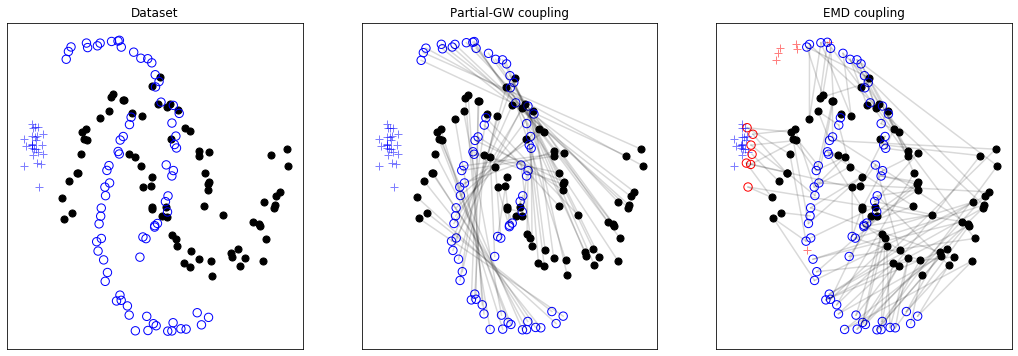

In [3]:
fig = plt.figure(figsize=(18,6))

ax = fig.add_subplot(131)
utils.plot_dataset(P, U, y, dim='2d', ax=ax)
ax.title.set_text('Dataset')

ax = fig.add_subplot(132)
transp_pu_emd = pgw.pu_gw_emd(C1, C2, mu, nu, nb_dummies)
y_hat = np.ones(len(y))
sum_dummies = np.sum(transp_pu_emd[-nb_dummies:], axis=0)
y_hat[np.argsort(sum_dummies)[n_unl_pos:]] = 0
utils.plot_dataset(P, U, y,y_hat = y_hat,transp=transp_pu_emd[:-nb_dummies], ax=ax)
ax.title.set_text('Partial-GW coupling')

ax = fig.add_subplot(133)
transp_pu_emd = pgw.pu_w_emd(mu, nu/np.sum(nu), Ctot, nb_dummies)
y_hat = np.ones(len(y))
sum_dummies = np.sum(transp_pu_emd[-nb_dummies:], axis=0)
y_hat[np.argsort(sum_dummies)[n_unl_pos:]] = 0
utils.plot_dataset(P, U, y,y_hat = y_hat,transp=transp_pu_emd[:-nb_dummies], ax=ax)
ax.title.set_text('EMD coupling')

## Fig. 2

In [4]:
# draw the dataset
n_pos = 10 #number of positive examples
n_unl_pos = 6 #nb of positive but unlabeled examples
n_unl_neg = 4 #nb of negative examples
n_unl = n_unl_pos+n_unl_neg

n_unl = n_unl_pos+n_unl_neg
prior = n_unl_pos/n_unl
P, U, y = utils.generate_dataset_moons_blobs(n_pos, n_unl_neg, n_unl_pos=n_unl_pos, dim='2d', rotated=True)

# compute weights and cost matrices
nb_dummies = 1
Ctot, C1, C2, mu, nu = pgw.compute_cost_matrices(P, U, prior, nb_dummies)

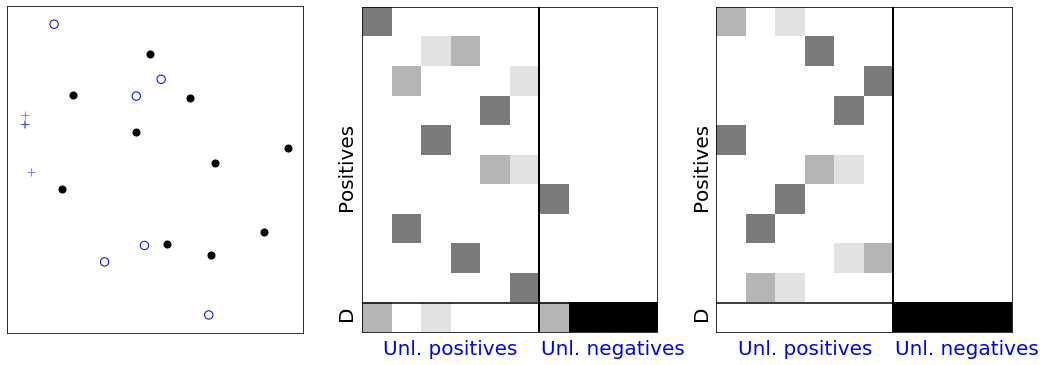

In [5]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(131)
utils.plot_dataset(P,U,y, ax=ax)

ax = fig.add_subplot(132)
transp_emd = ot.emd(mu, nu/np.sum(nu), Ctot)  # transport with no group constraints
ax.imshow(transp_emd, cmap = "Greys")
utils.annotate_transp_matrix(ax)

ax = fig.add_subplot(133)
transp_emd_groups = pgw.pu_w_emd(mu, nu/np.sum(nu), Ctot)  # transport with no group constraints
ax.imshow(transp_emd_groups, cmap = "Greys")
utils.annotate_transp_matrix(ax)


## Fig. 3

In [6]:
# draw the dataset
n_pos = 75 #number of positive examples
n_unl_pos = 75 #nb of positive but unlabeled examples
n_unl_neg = 25 #nb of negative examples
n_unl = n_unl_pos+n_unl_neg
prior = n_unl_pos/n_unl
P, U, y = utils.generate_dataset_moons_blobs(n_pos, n_unl_neg, n_unl_pos=n_unl_pos, dim='2d', rotated=True)
# compute weights and cost matrices
nb_dummies = 1
Ctot, C1, C2, mu, nu = pgw.compute_cost_matrices(P, U, prior, 1)


In [7]:
P_3d, U_3d, y_3d = utils.generate_dataset_moons_blobs(n_pos, n_unl_neg, n_unl_pos=n_unl_pos, dim='3d', rotated=True)
Ctot_3d, C1_3d, C2_3d, mu_3d, nu_3d = pgw.compute_cost_matrices(P_3d, U_3d, prior, 1)

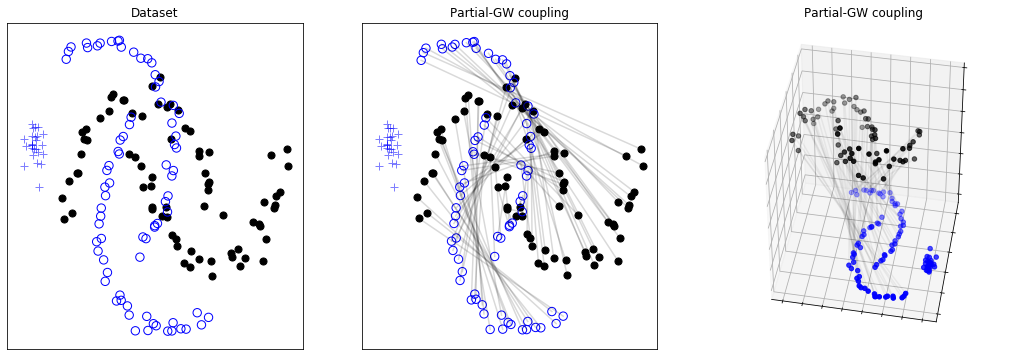

In [8]:
fig = plt.figure(figsize=(18,6))

ax = fig.add_subplot(131)
utils.plot_dataset(P, U, y, dim='2d', ax=ax)
ax.title.set_text('Dataset')

ax = fig.add_subplot(132)
transp_pu_emd = pgw.pu_gw_emd(C1, C2, mu, nu, nb_dummies)
y_hat = np.ones(len(y))
sum_dummies = np.sum(transp_pu_emd[-nb_dummies:], axis=0)
y_hat[np.argsort(sum_dummies)[n_unl_pos:]] = 0
utils.plot_dataset(P, U, y,y_hat = y_hat,transp=transp_pu_emd[:-nb_dummies], ax=ax)
ax.title.set_text('Partial-GW coupling')

ax = fig.add_subplot(133, projection='3d')
transp_pu_emd_3d = pgw.pu_gw_emd(C1_3d, C2_3d, mu_3d, nu_3d, nb_dummies)
y_hat = np.ones(len(y))
sum_dummies = np.sum(transp_pu_emd_3d[-nb_dummies:], axis=0)
y_hat[np.argsort(sum_dummies)[n_unl_pos:]] = 0
utils.plot_dataset(P_3d, U_3d, y_3d, y_hat = y_hat, dim='3d', transp=transp_pu_emd[:-nb_dummies], ax=ax)
ax.title.set_text('Partial-GW coupling')